i. Plot this function in order to understand its behaviour. Why is this challenging for gradient descent to
optimize?

This is difficult for gradient descent to minimize because there are many local minima, and so traditional gradient descent may get stuck in these local minima instead of finding optimal global minima.

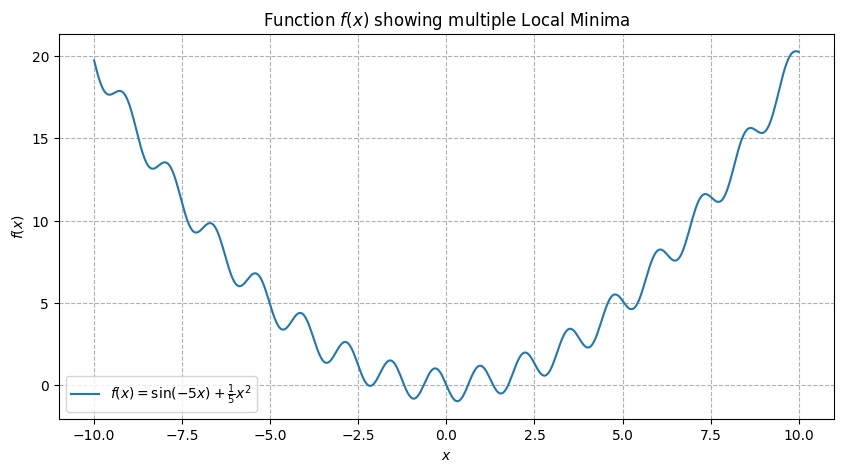

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def f(x):
    return np.sin(-5 * x) + (1/5) * x**2

def grad_f(x):
    return -5 * np.cos(-5 * x) + (2/5) * x

# Plot the function
x_vals = np.linspace(-10, 10, 500)
y_vals = f(x_vals)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label=r'$f(x) = \sin(-5x) + \frac{1}{5}x^2$')
plt.title('Function $f(x)$ showing multiple Local Minima')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

ii. Implement gradient descent for this function with learning rate η = 0.1, x0 = 20, and 20 iterations. Plot the trajectory of the resulting x values (i.e., plot x over iterations).

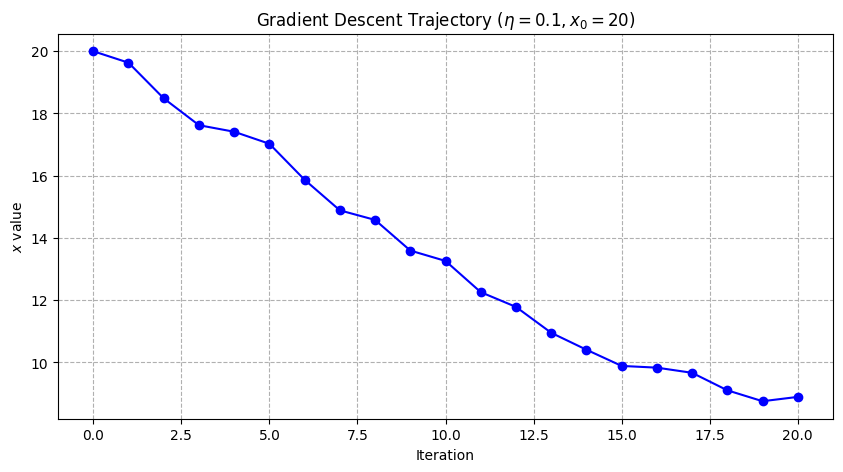

In [2]:
# Parameters for GD
eta = 0.1
x0 = 20
iterations = 20

def gradient_descent(grad_func, x_start, learning_rate, n_iters):
    x_history = [x_start]
    x_current = x_start
    for _ in range(n_iters):
        gradient = grad_func(x_current)
        x_current = x_current - learning_rate * gradient
        x_history.append(x_current)
    return np.array(x_history)

gd_x_history = gradient_descent(grad_f, x0, eta, iterations)

# Plotting the trajectory
plt.figure(figsize=(10, 5))
plt.plot(range(iterations + 1), gd_x_history, marker='o', linestyle='-', color='b')
plt.title(r'Gradient Descent Trajectory ($\eta=0.1, x_0=20$)')
plt.xlabel('Iteration')
plt.ylabel('$x$ value')
plt.grid(True, linestyle='--')
plt.show()

iii. Implement gradient descent with momentum for this function with learning rate η = 0.1, β = 0.5, x0 = 20, and 20 iterations. Plot the trajectory of the resulting x values. Which method achieves the optimum value?

From these results:
GD final x: 8.8935
GDM final x: -0.7266

Gradient descent with momentum was much more capable of reaching the optimum value of 0. This is because momentum allows the training loss to escape small local minima.

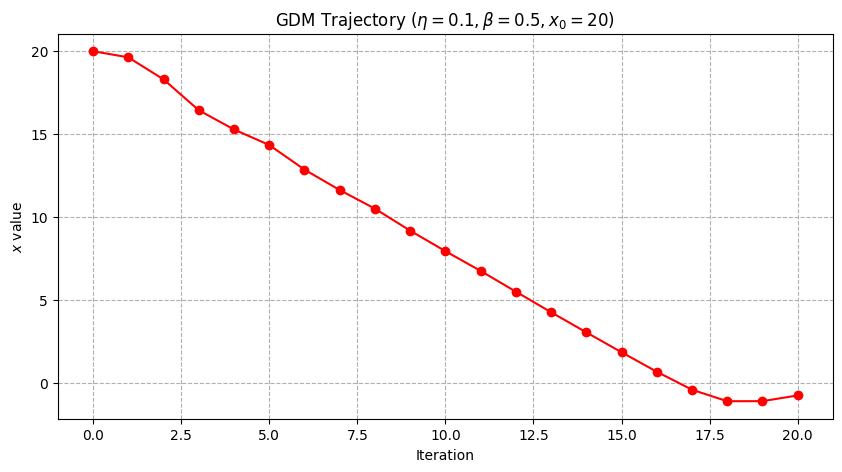

GD final x: 8.8935
GDM final x: -0.7266


In [3]:
# Parameters for GDM
eta = 0.1
beta = 0.5
x0 = 20
iterations = 20

def momentum_descent(grad_func, x_start, learning_rate, beta, n_iters):
    x_history = [x_start]
    x_current = x_start
    v_current = 0  # Initial velocity
    for _ in range(n_iters):
        gradient = grad_func(x_current)
        # Momentum update
        v_current = beta * v_current + learning_rate * gradient
        # Position update
        x_current = x_current - v_current
        x_history.append(x_current)
    return np.array(x_history)

gdm_x_history = momentum_descent(grad_f, x0, eta, beta, iterations)

# Plotting the trajectory
plt.figure(figsize=(10, 5))
plt.plot(range(iterations + 1), gdm_x_history, marker='o', linestyle='-', color='r')
plt.title(r'GDM Trajectory ($\eta=0.1, \beta=0.5, x_0=20$)')
plt.xlabel('Iteration')
plt.ylabel('$x$ value')
plt.grid(True, linestyle='--')
plt.show()

# Find the location of the minimum
print(f"GD final x: {gd_x_history[-1]:.4f}")
print(f"GDM final x: {gdm_x_history[-1]:.4f}")

iv. Let’s see how momentum affects trajectory behaviour near a minima. Set x0 = 0 and keep all parameters for both methods fixed. Plot the resulting trajectories for both methods. What do you see now?

Gradient Descent (GD) - Blue Line: The GD trajectory exhibits high-frequency oscillation with large amplitude. This is characteristic of GD moving between the steep positive and negative slopes on either side of the minimum, effectively bouncing back and forth. It makes very slow progress toward the actual minimum value, consistently overshooting due to the relatively large step size ($\eta=0.1$) on a function with rapidly changing curvature.

Gradient Descent with Momentum (GDM) - Red Line: The GDM trajectory, while initially exhibiting overshoot and oscillation (due to the momentum $\beta=0.75$ carrying it past the minimum), quickly damps out the oscillations. The momentum term helps the steps average out the erratic gradients, resulting in a smoother, faster convergence to a value near the minimum within the 20 iterations shown.

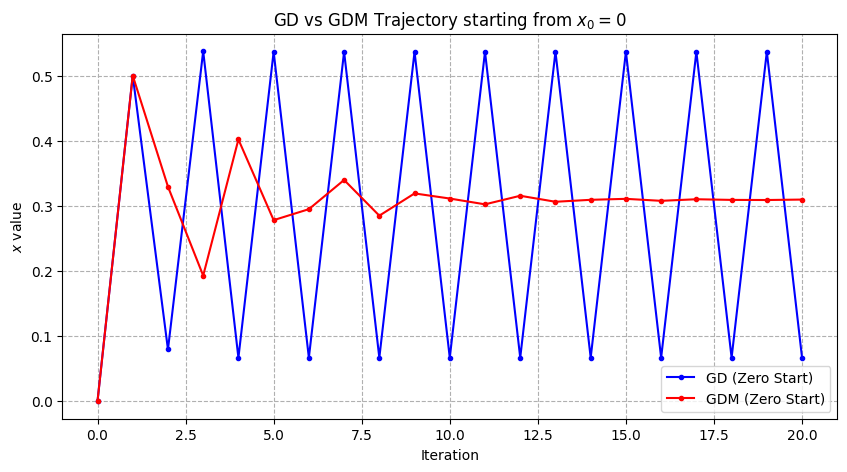

In [4]:
# Parameters remain the same: eta = 0.1, beta = 0.5, iterations = 20
x0_new = 0

gd_x_history_zero = gradient_descent(grad_f, x0_new, eta, iterations)
gdm_x_history_zero = momentum_descent(grad_f, x0_new, eta, beta, iterations)

# Plotting the trajectories together
plt.figure(figsize=(10, 5))
plt.plot(range(iterations + 1), gd_x_history_zero, marker='.', linestyle='-', color='b', label='GD (Zero Start)')
plt.plot(range(iterations + 1), gdm_x_history_zero, marker='.', linestyle='-', color='r', label='GDM (Zero Start)')
plt.title(r'GD vs GDM Trajectory starting from $x_0=0$')
plt.xlabel('Iteration')
plt.ylabel('$x$ value')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()